In [13]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
df = pd.read_csv('post_clean_1.csv')
print("Successfully loaded in the dataset")
print(f"Original shape: {df.shape}")

Successfully loaded in the dataset
Original shape: (95235, 24)


In [15]:
df.head()

,vehicle_type,pickup_location,drop_location,vehicle_arrival_time,ride_cost,distance,booking_timestamp,hour,day,month,day_of_month,is_cancelled,driver_ratings,customer_ratings,customer_patience,historical_customer_avg_rating,historical_customer_rating_binned,weather_timestamp,temperature,humidity,precipitation_mm,weather_condition,pickup_zone,drop_zone
0,Bike,Udyog Vihar,Ambience Mall,10.8,99.0,37.98,2024-01-01 00:19:34,0,Monday,1,1,0,Good,Good,new_customer,NaN,No Prior Rating,2024-01-01 00:00:00,7.1,99,0.0,Clear,Gurgaon,Gurgaon
1,Go Mini,Basai Dhankot,Madipur,8.5,114.0,39.29,2024-01-01 01:35:18,1,Monday,1,1,0,Good,Good,new_customer,NaN,No Prior Rating,2024-01-01 01:00:00,6.9,100,0.0,Clear,Gurgaon,West Delhi
2,Go Mini,Jhilmil,Welcome,8.1,735.0,39.39,2024-01-01 01:53:01,1,Monday,1,1,0,Good,Good,new_customer,NaN,No Prior Rating,2024-01-01 01:00:00,6.9,100,0.0,Clear,East Delhi,East Delhi
3,Go Mini,Sarojini Nagar,Madipur,2.9,918.0,44.21,2024-01-01 03:59:29,3,Monday,1,1,0,Good,Good,new_customer,NaN,No Prior Rating,2024-01-01 03:00:00,6.0,100,0.0,Mainly Clear/Cloudy,South Delhi,West Delhi
4,eBike,Panchsheel Park,Pragati Maidan,8.6,423.0,40.82,2024-01-01 04:00:07,4,Monday,1,1,0,Good,Good,new_customer,NaN,No Prior Rating,2024-01-01 04:00:00,6.5,99,0.0,Mainly Clear/Cloudy,South Delhi,Central Delhi


In [16]:
!pip install --upgrade scikit-learn

In [17]:
# --- ROBUST PLOTTING IMPORTS (HANDLES ALL SKLEARN VERSIONS) ---
from sklearn.metrics import classification_report
# We will try to import both sets of functions and set flags
try:
    # NEW way (sklearn 1.0+)
    from sklearn.metrics import ConfusionMatrixDisplay, RocAucDisplay
    plot_confusion_matrix = None
    plot_roc_curve = None
    use_display_functions = True
    print("Using new 'Display' plotting functions (sklearn 1.0+).")
except ImportError:
    try:
        # OLD way (sklearn < 1.0)
        from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
        ConfusionMatrixDisplay = None
        RocAucDisplay = None
        use_display_functions = False
        print("Using old 'plot_' plotting functions (sklearn < 1.0).")
    except ImportError as e:
        # FAILED
        print(f"Could not import any plotting functions. Plots will be skipped. Error: {e}")
        use_display_functions = None # Flag to skip plotting
# --- END OF ROBUST IMPORTS ---

Could not import any plotting functions. Plots will be skipped. Error: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.12/dist-packages/sklearn/metrics/__init__.py)


In [18]:
df1 = df.copy()

In [19]:
# --- ROBUST PLOTTING IMPORTS ---
try:
    from sklearn.metrics import ConfusionMatrixDisplay
    CAN_PLOT_CM = True
    print("Successfully imported ConfusionMatrixDisplay.")
except ImportError:
    print("Could not import ConfusionMatrixDisplay. Will skip Confusion Matrix plot.")
    CAN_PLOT_CM = False

# Try to import ROC-AUC plot
try:
    from sklearn.metrics import RocAucDisplay
    CAN_PLOT_ROC = True
    print("Successfully imported RocAucDisplay.")
except ImportError as e:
    print(f"Could not import RocAucDisplay. Will skip ROC-AUC plot. Error: {e}")
    CAN_PLOT_ROC = False

Successfully imported ConfusionMatrixDisplay.
Could not import RocAucDisplay. Will skip ROC-AUC plot. Error: cannot import name 'RocAucDisplay' from 'sklearn.metrics' (/usr/local/lib/python3.12/dist-packages/sklearn/metrics/__init__.py)


Random Forest Without SMOTE Unstratified


Loading data completed. Doing Random Forest Without SMOTE

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify due to class imbalance
Training set 1s: 1775 (2.33%)
Test set 1s: 460 (2.42%)

3. Training RandomForestClassifier
Model training complete.

4. Evaluating Model
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18587
           1       0.99      0.30      0.47       460

    accuracy                           0.98     19047
   macro avg       0.99      0.65      0.73     19047
weighted avg       0.98      0.98      0.98     19047

Plotting Confusion Matrix...


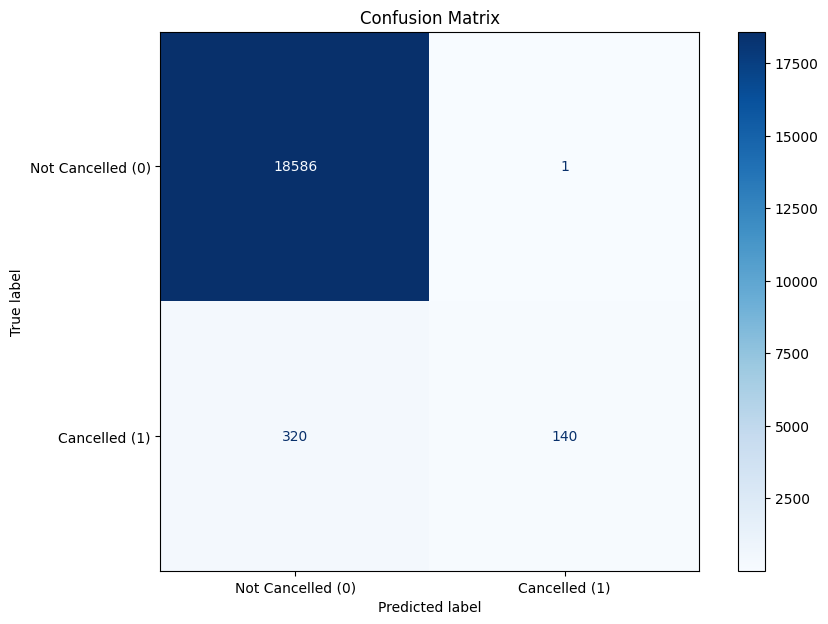

Plotting ROC-AUC Curve...
Skipping ROC-AUC plot (import failed).
7. Plotting Feature Importance


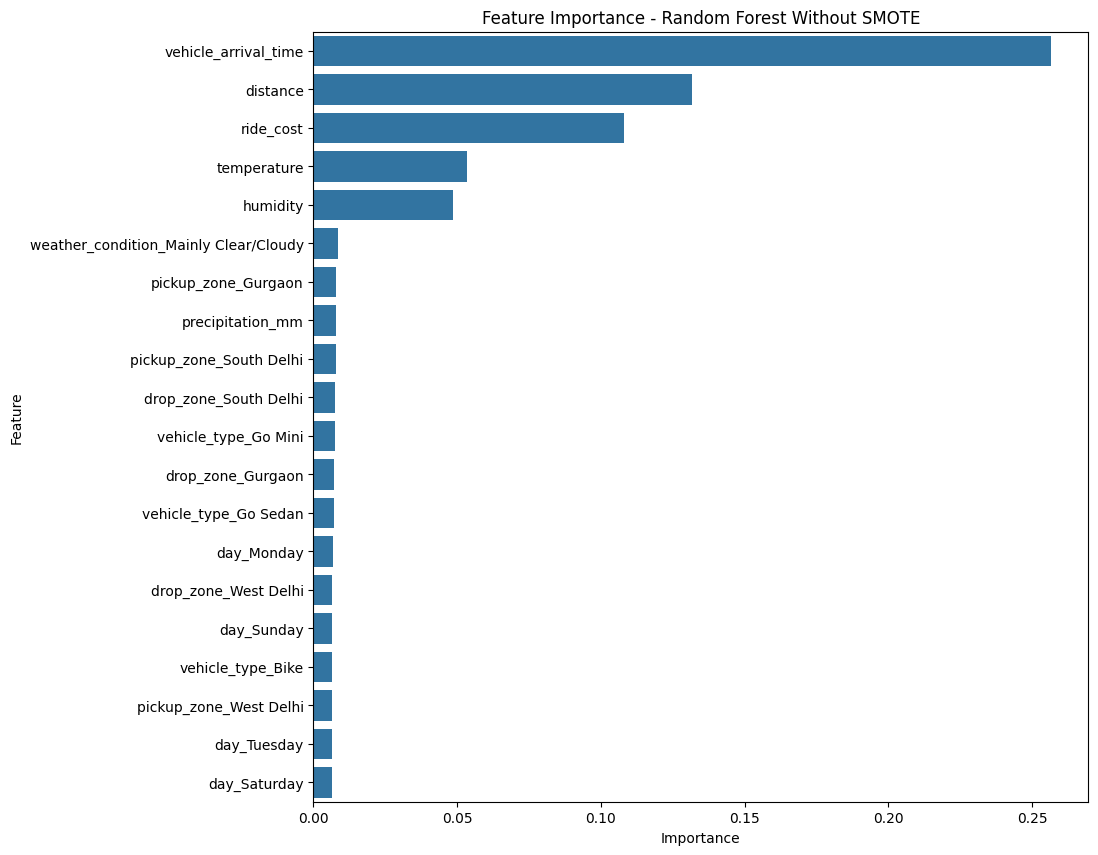

In [ ]:
print("Loading data completed. Doing Random Forest Without SMOTE\n")
# 1. Prepare X and y
print("1. Preparing X and y")
target_col = 'is_cancelled'

numerical_cols = ['vehicle_arrival_time', 'distance', 'ride_cost','temperature', 'humidity', 'precipitation_mm']
categorical_cols = [
    'vehicle_type',
    'customer_patience',
    'pickup_zone',
    'drop_zone',
    'historical_customer_rating_binned',
    'hour',
    'day',
    'month',
    'day_of_month',
    'weather_condition'
]

feature_cols = numerical_cols + [col for col in categorical_cols if col in df1.columns]

# Ensure all needed columns exist before proceeding
missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
if missing_cols:
    print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
    print("Script cannot continue. Please check your data loading and feature engineering steps.")
else:
    y = df1[target_col]
    X = df1[feature_cols]
    print(f"Original X shape: {X.shape}")
    X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
    print(f"New X shape after OHE: {X.shape}\n")

    # 2. Splitting data
    print("2. Splitting Data with Stratify due to class imbalance")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
    )
    print(f"Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
    print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

    # 3. Training the Random Forest Model
    print("3. Training RandomForestClassifier")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    rf_model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Evaluating the Model
    print("4. Evaluating Model")
    y_pred = rf_model.predict(X_test)
    print("Classification Report:")
    #zero_division=0 helps handle warnings
    print(classification_report(y_test, y_pred, zero_division=0))

    #5. Plot Confusion Matrix
    print("Plotting Confusion Matrix...")
    if CAN_PLOT_CM:
        fig, ax = plt.subplots(figsize=(10, 7))
        ConfusionMatrixDisplay.from_estimator(
            rf_model, X_test, y_test, cmap='Blues', ax=ax,
            display_labels=['Not Cancelled (0)', 'Cancelled (1)']
        )
        plt.title('Confusion Matrix')
        plt.show()
    else:
        print("Skipping Confusion Matrix plot (import failed).")

    #6. Plotting ROC-AUC Curve
    print("Plotting ROC-AUC Curve...")
    if CAN_PLOT_ROC:
        fig, ax = plt.subplots(figsize=(10, 7))
        RocAucDisplay.from_estimator(rf_model, X_test, y_test, ax=ax)
        plt.title('ROC-AUC Curve')
        plt.show()
    else:
        print("Skipping ROC-AUC plot (import failed).")

    #7. Plotting Feature Importance
    print("7. Plotting Feature Importance")
    importances = rf_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Feature Importance - Random Forest Without SMOTE')
    plt.show()

Stratefied KFold Random Forest Without SMOTE

Loading data completed. Doing Stratefied KFold Random Forest Without SMOTE

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify due to class imbalance
Training set 1s: 1788 (2.35%)
Test set 1s: 447 (2.35%)

2a. Starting Stratified K-Fold Cross-Validation...
K-Fold Cross-Validation Results
Scores for each fold: [0.98149583 0.98002129 0.98070832 0.98074877 0.98074877]
Average F1 Score (Weighted): 0.9807
Std Dev of F1 Score: 0.0005

3. Training RandomForestClassifier
Model training complete.

4. Evaluating Model
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18600
           1       1.00      0.32      0.48       447

    accuracy                           0.98     19047
   macro avg       0.99      0.66      0.74     19047
weighted avg       0.98      0.98      0.98     19047

Plotting Confusion Matrix...


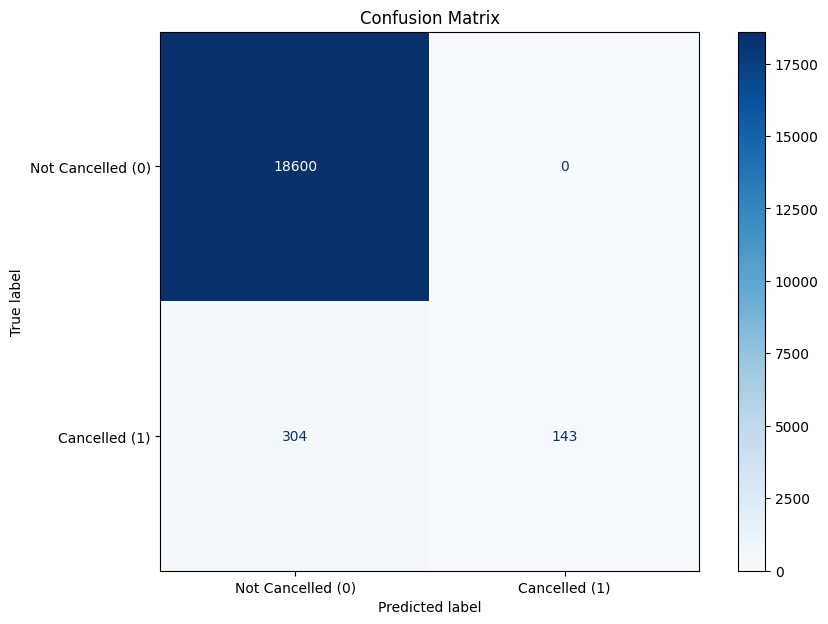

Plotting ROC-AUC Curve...
Skipping ROC-AUC plot (import failed).
7. Plotting Feature Importance


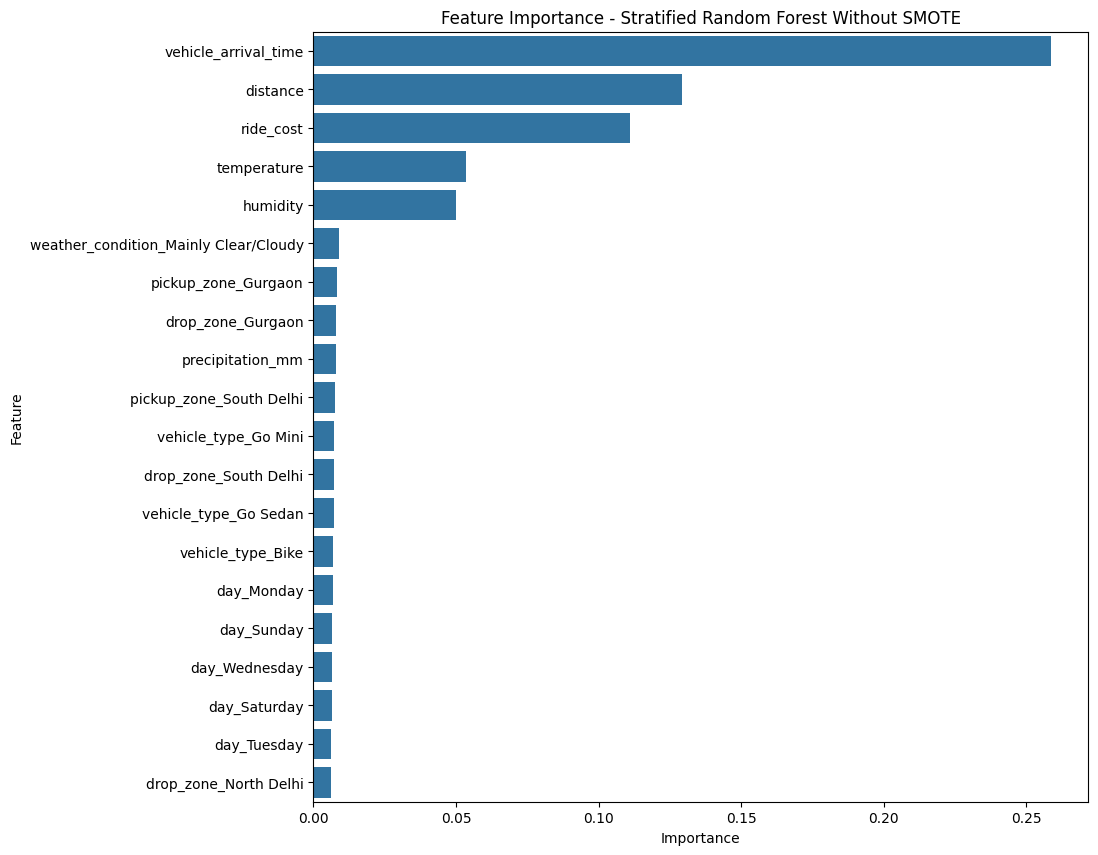

In [ ]:
print("Loading data completed. Doing Stratefied KFold Random Forest Without SMOTE\n")
# 1. Prepare X and y
print("1. Preparing X and y")
target_col = 'is_cancelled'
numerical_cols = ['vehicle_arrival_time', 'distance', 'ride_cost','temperature', 'humidity', 'precipitation_mm']

categorical_cols = [
    'vehicle_type',

    'customer_patience',
    'pickup_zone',
    'drop_zone',
    'historical_customer_rating_binned',
    'hour',
    'day',
    'month',
    'day_of_month',
    'weather_condition'
]

feature_cols = numerical_cols + [col for col in categorical_cols if col in df1.columns]

# Ensure all needed columns exist before proceeding
missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
if missing_cols:
    print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
    print("Script cannot continue. Please check your data loading and feature engineering steps.")

else:
    y = df1[target_col]
    X = df1[feature_cols]
    print(f"Original X shape: {X.shape}")
    X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
    print(f"New X shape after OHE: {X.shape}\n")

    # 2a. Splitting data
    print("2. Splitting Data with Stratify due to class imbalance")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print(f"Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
    print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

    # 2b. K-Fold Cross-Validation
    # Attempt to get a robust performance estimate by running 5-Fold Stratified CV on our 80% *training set*.
    print("2a. Starting Stratified K-Fold Cross-Validation...")

    cv_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )

    #stratified kfold with 5 fold
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    #Now to run the cross-validation
    #We'll use 'f1_weighted' as our score since it's good for imbalanced classes and minimizes low recall
    cv_scores = cross_val_score(cv_model, X_train, y_train, cv=kfold, scoring='f1_weighted', n_jobs=-1)

    print("K-Fold Cross-Validation Results")
    print(f"Scores for each fold: {cv_scores}")
    print(f"Average F1 Score (Weighted): {np.mean(cv_scores):.4f}")
    print(f"Std Dev of F1 Score: {np.std(cv_scores):.4f}\n")

    # 3. Training the Random Forest Model
    print("3. Training RandomForestClassifier")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    rf_model.fit(X_train, y_train)
    print("Model training complete.\n")

    # 4. Evaluating the Model
    print("4. Evaluating Model")
    y_pred = rf_model.predict(X_test)
    print("Classification Report:")
    #zero_division=0 helps handle warnings
    print(classification_report(y_test, y_pred, zero_division=0))

    #5. Plot Confusion Matrix
    print("Plotting Confusion Matrix...")
    if CAN_PLOT_CM:
        fig, ax = plt.subplots(figsize=(10, 7))
        ConfusionMatrixDisplay.from_estimator(
            rf_model, X_test, y_test, cmap='Blues', ax=ax,
            display_labels=['Not Cancelled (0)', 'Cancelled (1)']
        )
        plt.title('Confusion Matrix')
        plt.show()
    else:
        print("Skipping Confusion Matrix plot (import failed).")


    #6. Plotting ROC-AUC Curve
    print("Plotting ROC-AUC Curve...")
    if CAN_PLOT_ROC:
        fig, ax = plt.subplots(figsize=(10, 7))
        RocAucDisplay.from_estimator(rf_model, X_test, y_test, ax=ax)
        plt.title('ROC-AUC Curve')
        plt.show()
    else:
        print("Skipping ROC-AUC plot (import failed).")


    #7. Plotting Feature Importance
    print("7. Plotting Feature Importance")
    importances = rf_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Feature Importance - Stratified Random Forest Without SMOTE')
    plt.show()

In [20]:
try:
    from imblearn.over_sampling import SMOTE
    IMBLEARN_INSTALLED = True
    print("Successfully imported SMOTE from imbalanced-learn.")
except ImportError:
    print("WARNING: 'imbalanced-learn' library not found.")
    print("SMOTE cannot be used. Please install it by running this in a new cell:")
    print("!pip install imbalanced-learn")
    print("Then, restart your runtime and run this script again.")
    IMBLEARN_INSTALLED = False

Successfully imported SMOTE from imbalanced-learn.


Random Forest With SMOTE

Loading data completed. Doing Random Forest With SMOTE

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify
Original Training set 1s: 1775 (2.33%)
Test set 1s: 460 (2.42%)

3. Applying SMOTE to Training Data
Original training shape: 76188 samples
New resampled training shape: 148826 samples
New resampled 1s count: 74413 (50.00%)

4. Training RandomForestClassifier
Model training complete.

5. Evaluating Model
Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18587
           1       0.99      0.31      0.47       460

    accuracy                           0.98     19047
   macro avg       0.98      0.65      0.73     19047
weighted avg       0.98      0.98      0.98     19047

Plotting Confusion Matrix...


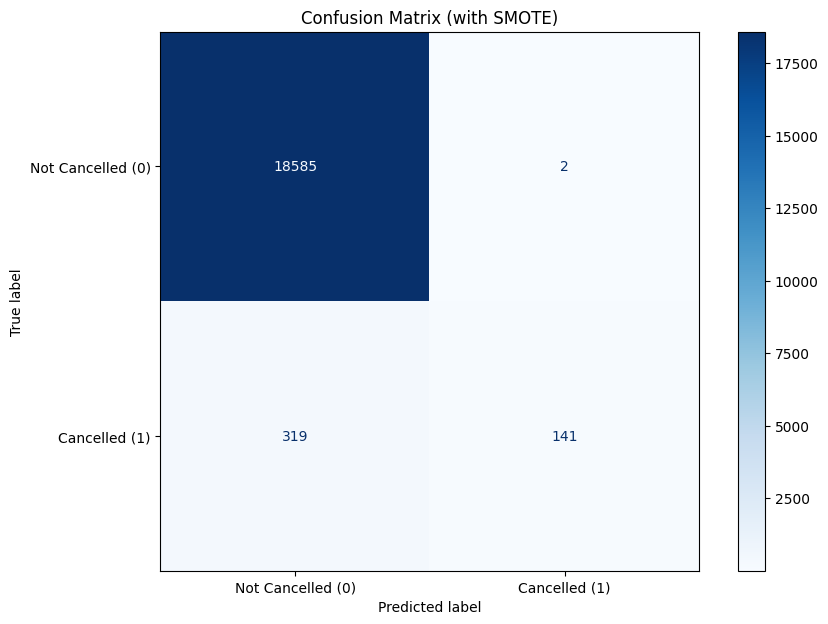

Plotting ROC-AUC Curve...
Skipping ROC-AUC plot (import failed).
8. Plotting Feature Importance


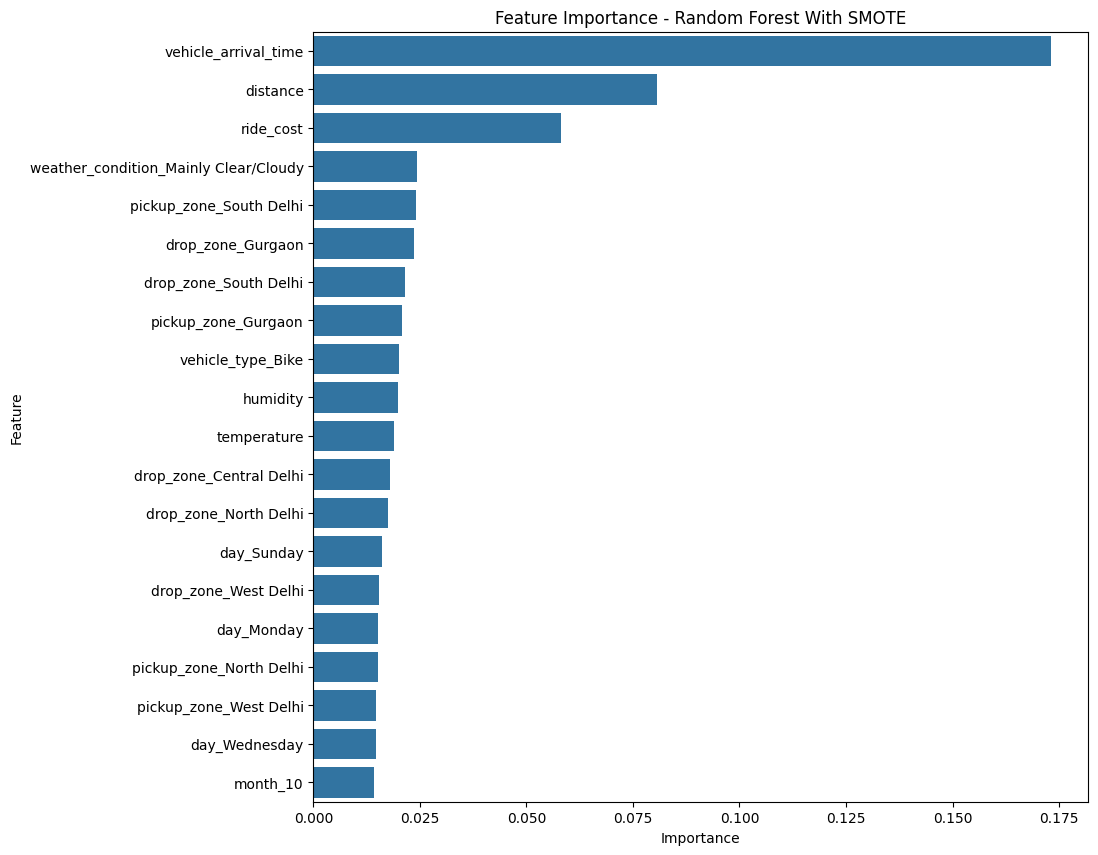

In [ ]:
print("Loading data completed. Doing Random Forest With SMOTE\n")

#1. Prepare X and y
print("1. Preparing X and y")
target_col = 'is_cancelled'
numerical_cols = [
    'vehicle_arrival_time', 'distance', 'ride_cost',
    'temperature', 'humidity', 'precipitation_mm'
]

categorical_cols = [
    'vehicle_type',
    'customer_patience',
    'pickup_zone',
    'drop_zone',
    'hour',
    'historical_customer_rating_binned',
    'day',
    'month',
    'day_of_month',
    'weather_condition'
]

numerical_cols = [col for col in numerical_cols if col in df1.columns]
categorical_cols = [col for col in categorical_cols if col in df1.columns]
feature_cols = numerical_cols + categorical_cols

missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
if missing_cols:
    print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
    raise KeyError(f"Missing required columns: {missing_cols}")
else:
    y = df1[target_col]
    X = df1[feature_cols]
    print(f"Original X shape: {X.shape}")
    X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
    print(f"New X shape after OHE: {X.shape}\n")

    #2. Split the Data
    print("2. Splitting Data with Stratify")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )
    print(f"Original Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
    print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

    # 3. APPLY SMOTE
    X_train_resampled = X_train
    y_train_resampled = y_train
    print("3. Applying SMOTE to Training Data")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"Original training shape: {y_train.shape[0]} samples")
    print(f"New resampled training shape: {y_train_resampled.shape[0]} samples")
    print(f"New resampled 1s count: {y_train_resampled.sum()} ({(y_train_resampled.mean()*100):.2f}%)\n")

    #4. Train the Random Forest Model
    print("4. Training RandomForestClassifier")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )

    # Train on the upsampled data
    rf_model.fit(X_train_resampled, y_train_resampled)
    print("Model training complete.\n")

    #5. Evaluate the Model
    print("5. Evaluating Model")
    #Evaluate on the ORIGINAL test set, do not touch test set with SMOTE
    y_pred = rf_model.predict(X_test)
    print("Classification Report with SMOTE:")
    print(classification_report(y_test, y_pred, zero_division=0))

    #6. Plot Confusion Matrix
    print("Plotting Confusion Matrix...")
    if CAN_PLOT_CM:
        fig, ax = plt.subplots(figsize=(10, 7))
        ConfusionMatrixDisplay.from_estimator(
            rf_model, X_test, y_test, cmap='Blues', ax=ax,
            display_labels=['Not Cancelled (0)', 'Cancelled (1)']
        )
        plt.title('Confusion Matrix (with SMOTE)')
        plt.show()
    else:
        print("Skipping Confusion Matrix plot (import failed).")

    #7. Plot ROC-AUC Curve
    print("Plotting ROC-AUC Curve...")
    if CAN_PLOT_ROC:
        fig, ax = plt.subplots(figsize=(10, 7))
        RocAucDisplay.from_estimator(rf_model, X_test, y_test, ax=ax)
        plt.title('ROC-AUC Curve (with SMOTE)')
        plt.show()
    else:
        print("Skipping ROC-AUC plot (import failed).")

    #8. Plot Feature Importance
    print("8. Plotting Feature Importance")
    importances = rf_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Feature Importance - Random Forest With SMOTE')
    plt.show()


Stratefied KFold Random Forest With SMOTE

Loading data completed. Doing Stratefied KFold Random Forest With SMOTE

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify
Original Training set 1s: 1788 (2.35%)
Test set 1s: 447 (2.35%)

3. Applying SMOTE to Training Data
Original training shape: 76188 samples
New resampled training shape: 148800 samples
New resampled 1s count: 74400 (50.00%)

2a. Starting Stratified K-Fold Cross-Validation...
K-Fold Cross-Validation Results
Scores for each fold: [0.99217023 0.99287599 0.99210301 0.99243908 0.99196857]
Average F1 Score (Weighted): 0.9923
Std Dev of F1 Score: 0.0003

4. Training RandomForestClassifier
Model training complete.

5. Evaluating Model
Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18600
           1       1.00      0.32      0.48       447

    accuracy                           0.98     19047
   macro avg       0.99

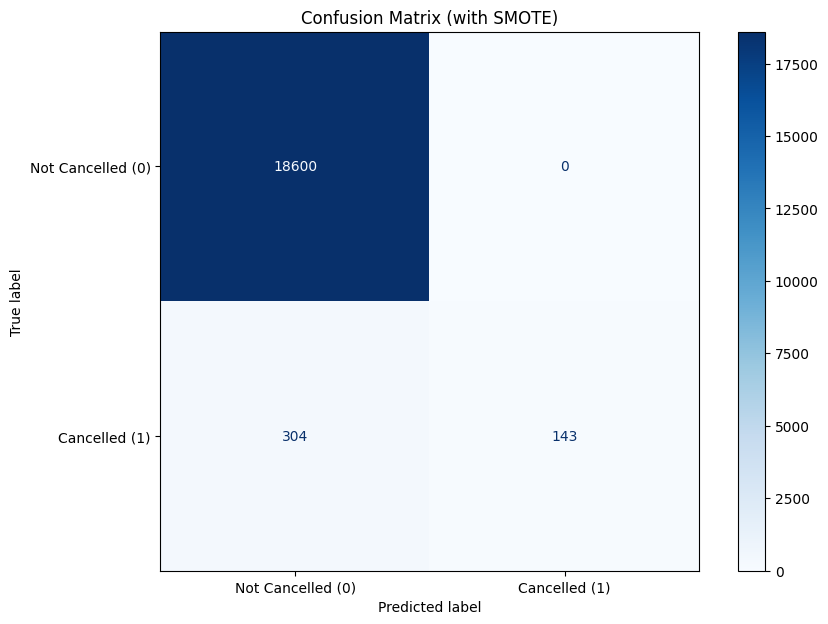

Plotting ROC-AUC Curve...
Skipping ROC-AUC plot (import failed).
8. Plotting Feature Importance


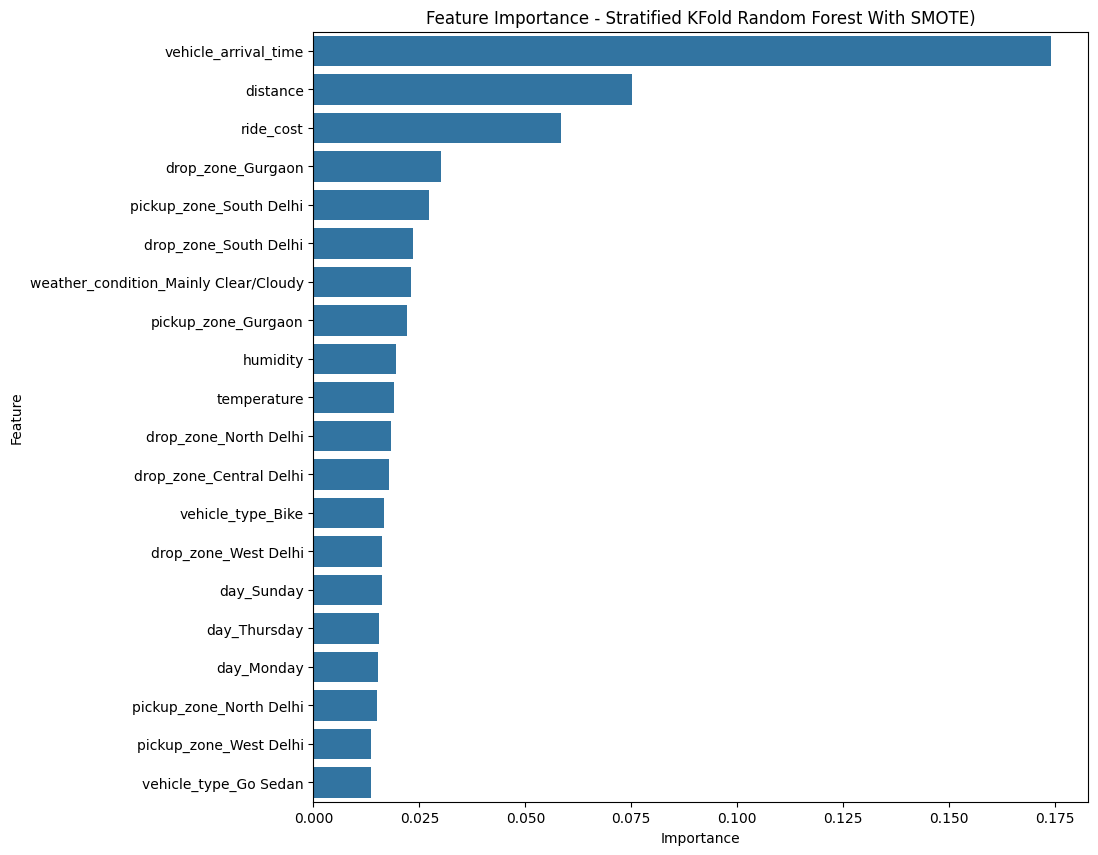

In [ ]:
print("Loading data completed. Doing Stratefied KFold Random Forest With SMOTE\n")

#1. Prepare X and y
print("1. Preparing X and y")
target_col = 'is_cancelled'
numerical_cols = [
    'vehicle_arrival_time', 'distance', 'ride_cost',
    'temperature', 'humidity', 'precipitation_mm'
]

categorical_cols = [
    'vehicle_type',
    'customer_patience',
    'pickup_zone',
    'drop_zone',
    'hour',
    'historical_customer_rating_binned',
    'day',
    'month',
    'day_of_month',
    'weather_condition'
]

numerical_cols = [col for col in numerical_cols if col in df1.columns]
categorical_cols = [col for col in categorical_cols if col in df1.columns]
feature_cols = numerical_cols + categorical_cols

missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
if missing_cols:
    print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
    raise KeyError(f"Missing required columns: {missing_cols}")
else:
    y = df1[target_col]
    X = df1[feature_cols]
    print(f"Original X shape: {X.shape}")
    X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
    print(f"New X shape after OHE: {X.shape}\n")

    #2. Split the Data
    print("2. Splitting Data with Stratify")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print(f"Original Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
    print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")


    #3a. APPLY SMOTE
    X_train_resampled = X_train
    y_train_resampled = y_train
    print("3. Applying SMOTE to Training Data")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print(f"Original training shape: {y_train.shape[0]} samples")
    print(f"New resampled training shape: {y_train_resampled.shape[0]} samples")
    print(f"New resampled 1s count: {y_train_resampled.sum()} ({(y_train_resampled.mean()*100):.2f}%)\n")


    # 3b. K-Fold Cross-Validation
    # Attempt to get a robust performance estimate by running 5-Fold Stratified CV on our 80% *training set*.
    print("2a. Starting Stratified K-Fold Cross-Validation...")

    cv_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )

    #stratified kfold with 5 fold
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    #Now to run the cross-validation
    #We'll use 'f1_weighted' as our score since it's good for imbalanced classes and minimizes low recall
    cv_scores = cross_val_score(cv_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='f1_weighted', n_jobs=-1)

    print("K-Fold Cross-Validation Results")
    print(f"Scores for each fold: {cv_scores}")
    print(f"Average F1 Score (Weighted): {np.mean(cv_scores):.4f}")
    print(f"Std Dev of F1 Score: {np.std(cv_scores):.4f}\n")

    #4. Train the Random Forest Model
    print("4. Training RandomForestClassifier")
    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )

    # Train on the upsampled data
    rf_model.fit(X_train_resampled, y_train_resampled)
    print("Model training complete.\n")

    #5. Evaluate the Model
    print("5. Evaluating Model")
    #Evaluate on the ORIGINAL test set, do not touch test set with SMOTE
    y_pred = rf_model.predict(X_test)
    print("Classification Report with SMOTE:")
    print(classification_report(y_test, y_pred, zero_division=0))

    #6. Plot Confusion Matrix
    print("Plotting Confusion Matrix...")
    if CAN_PLOT_CM:
        fig, ax = plt.subplots(figsize=(10, 7))
        ConfusionMatrixDisplay.from_estimator(
            rf_model, X_test, y_test, cmap='Blues', ax=ax,
            display_labels=['Not Cancelled (0)', 'Cancelled (1)']
        )
        plt.title('Confusion Matrix (with SMOTE)')
        plt.show()
    else:
        print("Skipping Confusion Matrix plot (import failed).")


    #7. Plot ROC-AUC Curve
    print("Plotting ROC-AUC Curve...")
    if CAN_PLOT_ROC:
        fig, ax = plt.subplots(figsize=(10, 7))
        RocAucDisplay.from_estimator(rf_model, X_test, y_test, ax=ax)
        plt.title('ROC-AUC Curve (with SMOTE)')
        plt.show()
    else:
        print("Skipping ROC-AUC plot (import failed).")


    #8. Plot Feature Importance
    print("8. Plotting Feature Importance")
    importances = rf_model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Feature Importance - Stratified KFold Random Forest With SMOTE)')
    plt.show()


In [21]:
try:
    from xgboost import XGBClassifier
    XGB_INSTALLED = True
    print("Successfully imported XGBClassifier.")
except ImportError:
    print("="*50)
    print("WARNING: 'xgboost' library not found.")
    print("XGBoost model cannot be run. Please install it by running this in a new cell:")
    print("!pip install xgboost")
    print("Then, restart your runtime and run this script again.")
    print("="*50)
    XGB_INSTALLED = False

Successfully imported XGBClassifier.


Basic XGBoost Model

Loading data completed. Doing XGBoost Model

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify
Training set 1s: 1775 (2.33%)
Test set 1s: 460 (2.42%)

3a. Calculating 'scale_pos_weight' for XGBoost...
Scale Pos Weight (0s / 1s): 41.92

3b. Starting Stratified K-Fold Cross-Validation (XGBoost)...
--- Fold 1/5 ---
--- Fold 2/5 ---
--- Fold 3/5 ---
--- Fold 4/5 ---
--- Fold 5/5 ---

XGBoost K-Fold CV Results
Avg F1 (Weighted): 0.9392 (+/- 0.0023)
Avg Recall (Class 1): 0.5054 (+/- 0.0136)

3c. Training FINAL XGBoostClassifier on 80% of data...
Final Model training complete.

4. Evaluating FINAL Model on 20% Hold-Out Test Set
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18587
           1       0.52      0.33      0.41       460

    accuracy                           0.98     19047
   macro avg       0.75      0.66      0.70     19

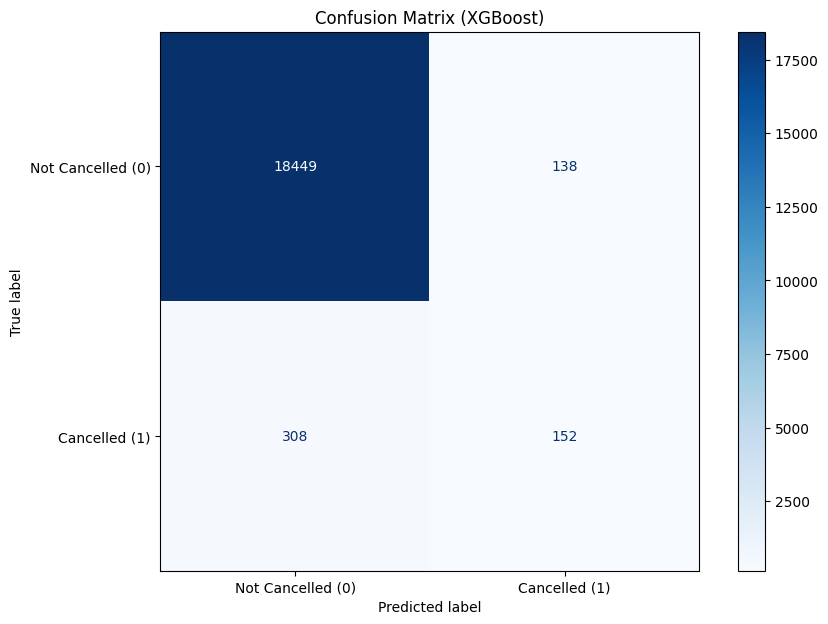

Plotting ROC-AUC Curve...
7. Plotting Feature Importance


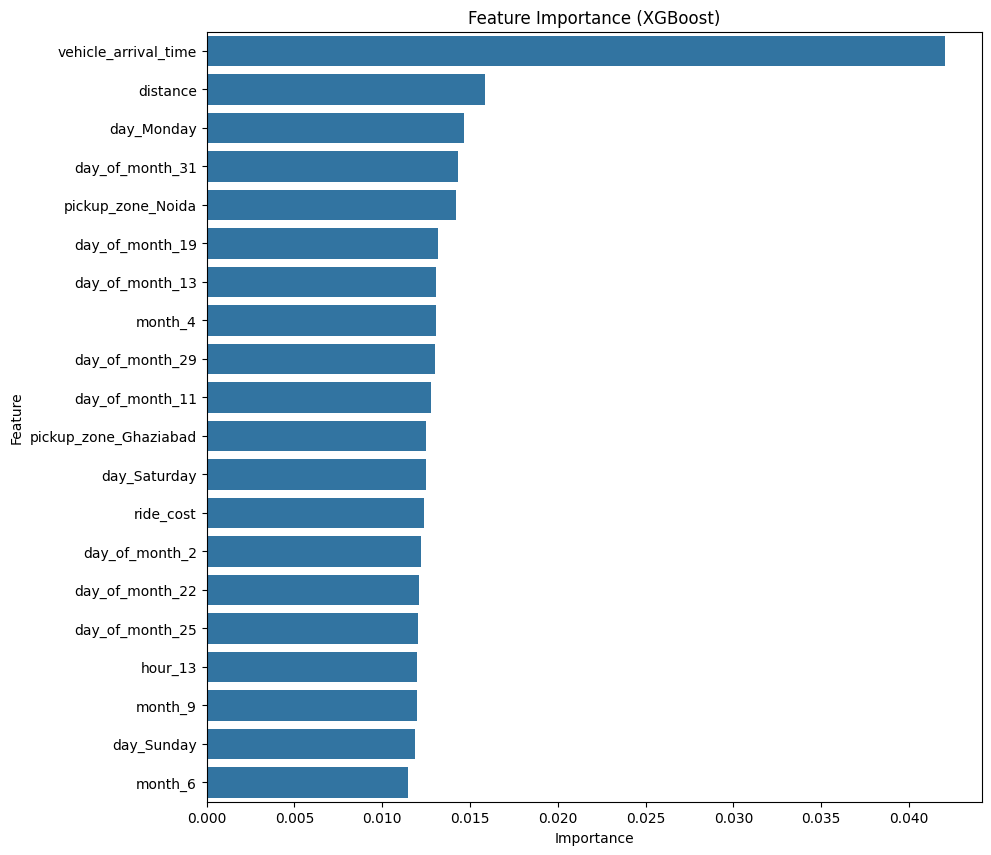

In [22]:
print("Loading data completed. Doing XGBoost Model\n")

#1. Prepare X and y
print("1. Preparing X and y")
target_col = 'is_cancelled'
numerical_cols = ['vehicle_arrival_time', 'distance', 'ride_cost','temperature', 'humidity', 'precipitation_mm']

categorical_cols = [
    'vehicle_type',
    'customer_patience',
    'pickup_zone',
    'drop_zone',
    'historical_customer_rating_binned',
    'hour',
    'day',
    'month',
    'day_of_month',
    'weather_condition'
]

numerical_cols = [col for col in numerical_cols if col in df1.columns]
categorical_cols = [col for col in categorical_cols if col in df1.columns]
feature_cols = numerical_cols + categorical_cols

missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
if missing_cols:
    print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
    raise KeyError(f"Missing required columns: {missing_cols}")

else:
    y = df1[target_col]
    X = df1[feature_cols]
    print(f"Original X shape: {X.shape}")
    X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
    print(f"New X shape after OHE: {X.shape}\n")

    # 2. Splitting data
    print("2. Splitting Data with Stratify")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )
    print(f"Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
    print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

    # 3a. Calculate scale_pos_weight for XGBoost
    print("3a. Calculating 'scale_pos_weight' for XGBoost...")
    counts = y_train.value_counts()
    scale_pos_weight = counts[0] / counts[1]
    print(f"Scale Pos Weight (0s / 1s): {scale_pos_weight:.2f}\n")

    # 3b. NEW: K-Fold Cross-Validation with XGBoost
    if XGB_INSTALLED:
        print("3b. Starting Stratified K-Fold Cross-Validation (XGBoost)...")

        cv_model = XGBClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1,
            scale_pos_weight=scale_pos_weight, #uses XGBoost's native imbalance parameter to give more weight importance to class 1
            early_stopping_rounds=10 #stops training if it doesn't improve
        )

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        #implementing custom loop to facilitate early stopping properly
        cv_scores_f1 = []
        cv_scores_recall = []

        for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
            print(f"--- Fold {fold+1}/5 ---")
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            #fitting with an eval_set for early stopping
            cv_model.fit(
                X_train_fold, y_train_fold,
                eval_set=[(X_val_fold, y_val_fold)],
                verbose=False # False hides training logs, True displays it
            )

            fold_preds = cv_model.predict(X_val_fold)
            #getting the full report to extract recall for class 1
            report = classification_report(y_val_fold, fold_preds, output_dict=True, zero_division=0)
            cv_scores_f1.append(report['weighted avg']['f1-score'])
            cv_scores_recall.append(report['1']['recall'])

        print("\nXGBoost K-Fold CV Results")
        print(f"Avg F1 (Weighted): {np.mean(cv_scores_f1):.4f} (+/- {np.std(cv_scores_f1):.4f})")
        print(f"Avg Recall (Class 1): {np.mean(cv_scores_recall):.4f} (+/- {np.std(cv_scores_recall):.4f})\n")


    # 3c. Training the FINAL XGBoost Model
    if XGB_INSTALLED:
        print("3c. Training FINAL XGBoostClassifier on 80% of data...")
        xgb_model = XGBClassifier(
            n_estimators=500, # because of early stopping, we can have a high amount of estimators without he long training time downside
            random_state=42,
            n_jobs=-1,
            scale_pos_weight=scale_pos_weight,
            early_stopping_rounds=20 # stop the training if validation score doesn't improve for 20 rounds
        )

        #we'll use the 20% test set as our eval set for early stopping
        xgb_model.fit(
            X_train, y_train,
            eval_set=[(X_test, y_test)],
            verbose=False
        )
        print("Final Model training complete.\n")

        # 4. Evaluating the Model
        print("4. Evaluating FINAL Model on 20% Hold-Out Test Set")
        y_pred = xgb_model.predict(X_test)
        print("Classification Report (XGBoost):")
        print(classification_report(y_test, y_pred, zero_division=0))

        #5. Plot Confusion Matrix
        print("Plotting Confusion Matrix...")
        if CAN_PLOT_CM:
            fig, ax = plt.subplots(figsize=(10, 7))
            ConfusionMatrixDisplay.from_estimator(
                xgb_model, X_test, y_test, cmap='Blues', ax=ax,
                display_labels=['Not Cancelled (0)', 'Cancelled (1)']
            )
            plt.title('Confusion Matrix (XGBoost)')
            plt.show()

        #6. Plotting ROC-AUC Curve
        print("Plotting ROC-AUC Curve...")
        if CAN_PLOT_ROC:
            fig, ax = plt.subplots(figsize=(10, 7))
            RocAucDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax)
            plt.title('ROC-AUC Curve (XGBoost)')
            plt.show()

        #7. Plotting Feature Importance
        print("7. Plotting Feature Importance")
        importances = xgb_model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 10))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        plt.title('Feature Importance (XGBoost)')
        plt.show()

    else:
        print("XGBoost script skipped as 'xgboost' library is not installed.")

XGBoost Stratify


Loading data completed. Doing XGBoost Model

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify
Training set 1s: 1788 (2.35%)
Test set 1s: 447 (2.35%)

3a. Calculating 'scale_pos_weight' for XGBoost...
Scale Pos Weight (0s / 1s): 41.61

3b. Starting Stratified K-Fold Cross-Validation (XGBoost)...
--- Fold 1/5 ---
--- Fold 2/5 ---
--- Fold 3/5 ---
--- Fold 4/5 ---
--- Fold 5/5 ---

XGBoost K-Fold CV Results
Avg F1 (Weighted): 0.9382 (+/- 0.0022)
Avg Recall (Class 1): 0.5173 (+/- 0.0091)

3c. Training FINAL XGBoostClassifier on 80% of data...
Final Model training complete.

4. Evaluating FINAL Model on 20% Hold-Out Test Set
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18600
           1       0.47      0.34      0.39       447

    accuracy                           0.98     19047
   macro avg       0.73      0.66      0.69     19

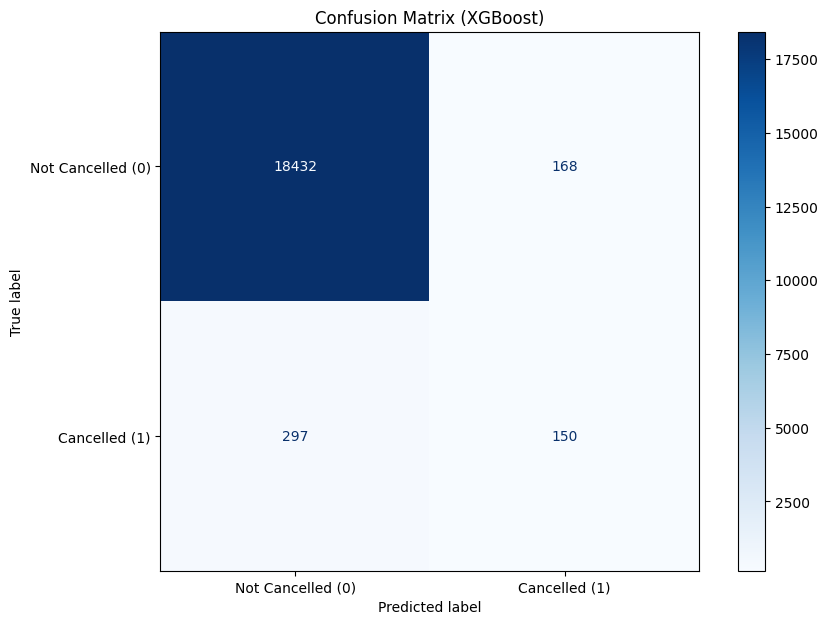

Plotting ROC-AUC Curve...
7. Plotting Feature Importance


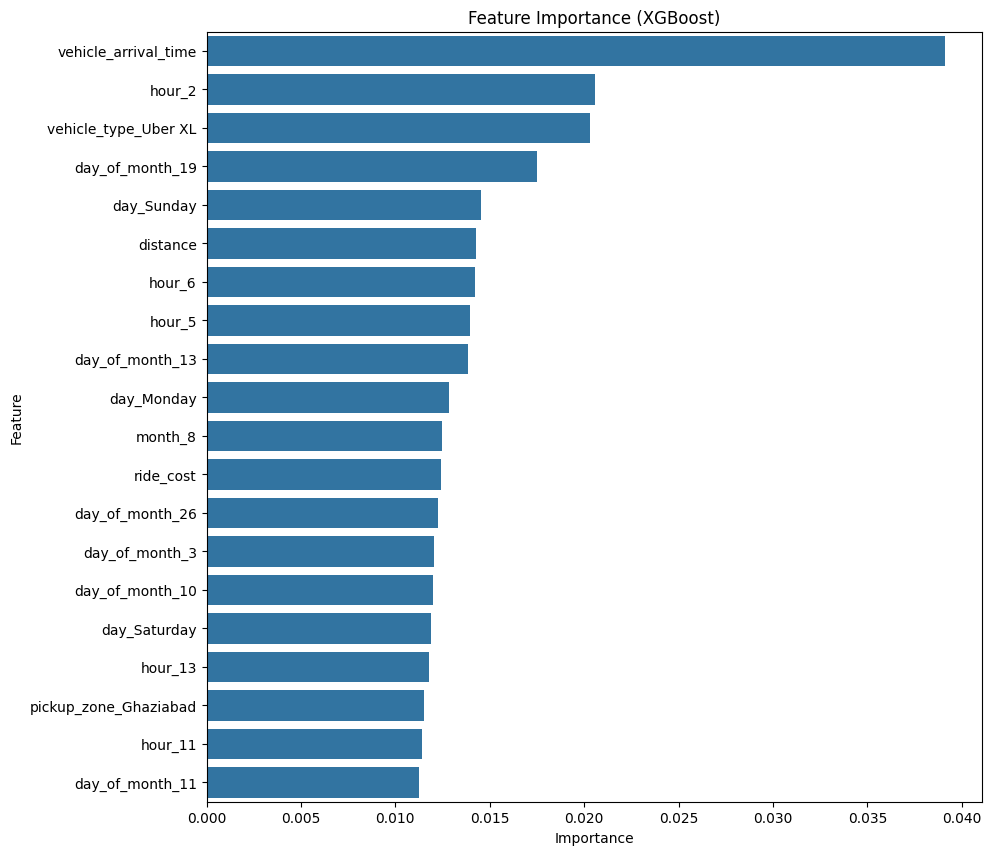

In [23]:
print("Loading data completed. Doing XGBoost Model\n")

#1. Prepare X and y
print("1. Preparing X and y")
target_col = 'is_cancelled'
numerical_cols = ['vehicle_arrival_time', 'distance', 'ride_cost','temperature', 'humidity', 'precipitation_mm']

categorical_cols = [
    'vehicle_type',
    'customer_patience',
    'pickup_zone',
    'drop_zone',
    'historical_customer_rating_binned',
    'hour',
    'day',
    'month',
    'day_of_month',
    'weather_condition'
]

numerical_cols = [col for col in numerical_cols if col in df1.columns]
categorical_cols = [col for col in categorical_cols if col in df1.columns]
feature_cols = numerical_cols + categorical_cols

missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
if missing_cols:
    print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
    raise KeyError(f"Missing required columns: {missing_cols}")

else:
    y = df1[target_col]
    X = df1[feature_cols]
    print(f"Original X shape: {X.shape}")
    X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
    print(f"New X shape after OHE: {X.shape}\n")

    # 2. Splitting data
    print("2. Splitting Data with Stratify")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print(f"Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
    print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

    # 3a. Calculate scale_pos_weight for XGBoost
    print("3a. Calculating 'scale_pos_weight' for XGBoost...")
    counts = y_train.value_counts()
    scale_pos_weight = counts[0] / counts[1]
    print(f"Scale Pos Weight (0s / 1s): {scale_pos_weight:.2f}\n")

    # 3b. NEW: K-Fold Cross-Validation with XGBoost
    if XGB_INSTALLED:
        print("3b. Starting Stratified K-Fold Cross-Validation (XGBoost)...")

        cv_model = XGBClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1,
            scale_pos_weight=scale_pos_weight, #uses XGBoost's native imbalance parameter to give more weight importance to class 1
            early_stopping_rounds=10 #stops training if it doesn't improve
        )

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        #implementing custom loop to facilitate early stopping properly
        cv_scores_f1 = []
        cv_scores_recall = []

        for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
            print(f"--- Fold {fold+1}/5 ---")
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            #fitting with an eval_set for early stopping
            cv_model.fit(
                X_train_fold, y_train_fold,
                eval_set=[(X_val_fold, y_val_fold)],
                verbose=False # False hides training logs, True displays it
            )

            fold_preds = cv_model.predict(X_val_fold)
            #getting the full report to extract recall for class 1
            report = classification_report(y_val_fold, fold_preds, output_dict=True, zero_division=0)
            cv_scores_f1.append(report['weighted avg']['f1-score'])
            cv_scores_recall.append(report['1']['recall'])

        print("\nXGBoost K-Fold CV Results")
        print(f"Avg F1 (Weighted): {np.mean(cv_scores_f1):.4f} (+/- {np.std(cv_scores_f1):.4f})")
        print(f"Avg Recall (Class 1): {np.mean(cv_scores_recall):.4f} (+/- {np.std(cv_scores_recall):.4f})\n")


    # 3c. Training the FINAL XGBoost Model
    if XGB_INSTALLED:
        print("3c. Training FINAL XGBoostClassifier on 80% of data...")
        #creating a clean validation set to prevent data leakage
        X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
            X_train, y_train,
            test_size=0.1, # Using 10% of the training data as a validation set
            random_state=42,
            stratify=y_train
        )

        xgb_model = XGBClassifier(
            n_estimators=500, # because of early stopping, we can have a high amount of estimators without he long training time downside
            random_state=42,
            n_jobs=-1,
            scale_pos_weight=scale_pos_weight,
            early_stopping_rounds=20 # stop the training if validation score doesn't improve for 20 rounds
        )

        #we'll use the 20% test set as our eval set for early stopping
        xgb_model.fit(
            X_train_final, y_train_final,
            eval_set=[(X_val_final, y_val_final)],
            verbose=False
        )
        print("Final Model training complete.\n")

        # 4. Evaluating the Model
        print("4. Evaluating FINAL Model on 20% Hold-Out Test Set")
        y_pred = xgb_model.predict(X_test)
        print("Classification Report (XGBoost):")
        print(classification_report(y_test, y_pred, zero_division=0))

        #5. Plot Confusion Matrix
        print("Plotting Confusion Matrix...")
        if CAN_PLOT_CM:
            fig, ax = plt.subplots(figsize=(10, 7))
            ConfusionMatrixDisplay.from_estimator(
                xgb_model, X_test, y_test, cmap='Blues', ax=ax,
                display_labels=['Not Cancelled (0)', 'Cancelled (1)']
            )
            plt.title('Confusion Matrix (XGBoost)')
            plt.show()

        #6. Plotting ROC-AUC Curve
        print("Plotting ROC-AUC Curve...")
        if CAN_PLOT_ROC:
            fig, ax = plt.subplots(figsize=(10, 7))
            RocAucDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax)
            plt.title('ROC-AUC Curve (XGBoost)')
            plt.show()

        #7. Plotting Feature Importance
        print("7. Plotting Feature Importance")
        importances = xgb_model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 10))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        plt.title('Feature Importance (XGBoost)')
        plt.show()

    else:
        print("XGBoost script skipped as 'xgboost' library is not installed.")

XGBoost With Larger Tolerance Before Stopping To Find Best Tree

Loading data completed. Doing XGBoost Model

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify
Training set 1s: 1788 (2.35%)
Test set 1s: 447 (2.35%)

3a. Calculating 'scale_pos_weight' for XGBoost...
Scale Pos Weight (0s / 1s): 41.61

3b. Starting Stratified K-Fold CV to find optimal tree count...
--- Fold 1/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [14:52:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


Fold 1 best tree count: 361
--- Fold 2/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [14:53:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


Fold 2 best tree count: 340
--- Fold 3/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [14:53:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


Fold 3 best tree count: 380
--- Fold 4/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [14:53:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


Fold 4 best tree count: 396
--- Fold 5/5 ---


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [14:53:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


Fold 5 best tree count: 395

Average optimal number of estimators: 374

--- XGBoost K-Fold CV Results ---
Avg Recall (Class 1): 0.3613 (+/- 0.0166)

3c. Training FINAL XGBoostClassifier with optimal estimators...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:53:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final Model training complete.

4. Evaluating FINAL Model on 20% Hold-Out Test Set
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18600
           1       0.43      0.35      0.39       447

    accuracy                           0.97     19047
   macro avg       0.71      0.67      0.69     19047
weighted avg       0.97      0.97      0.97     19047

Plotting Confusion Matrix...


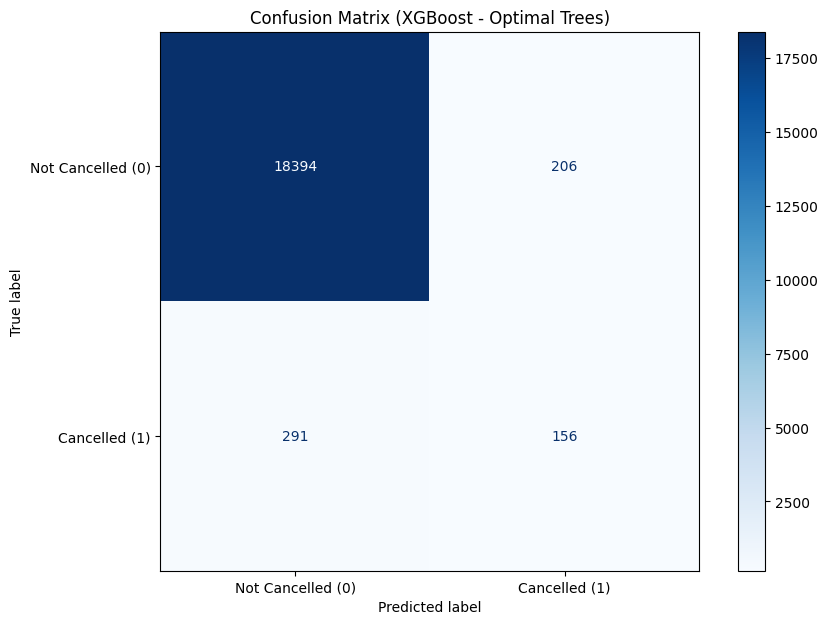

Plotting ROC-AUC Curve...
7. Plotting Feature Importance


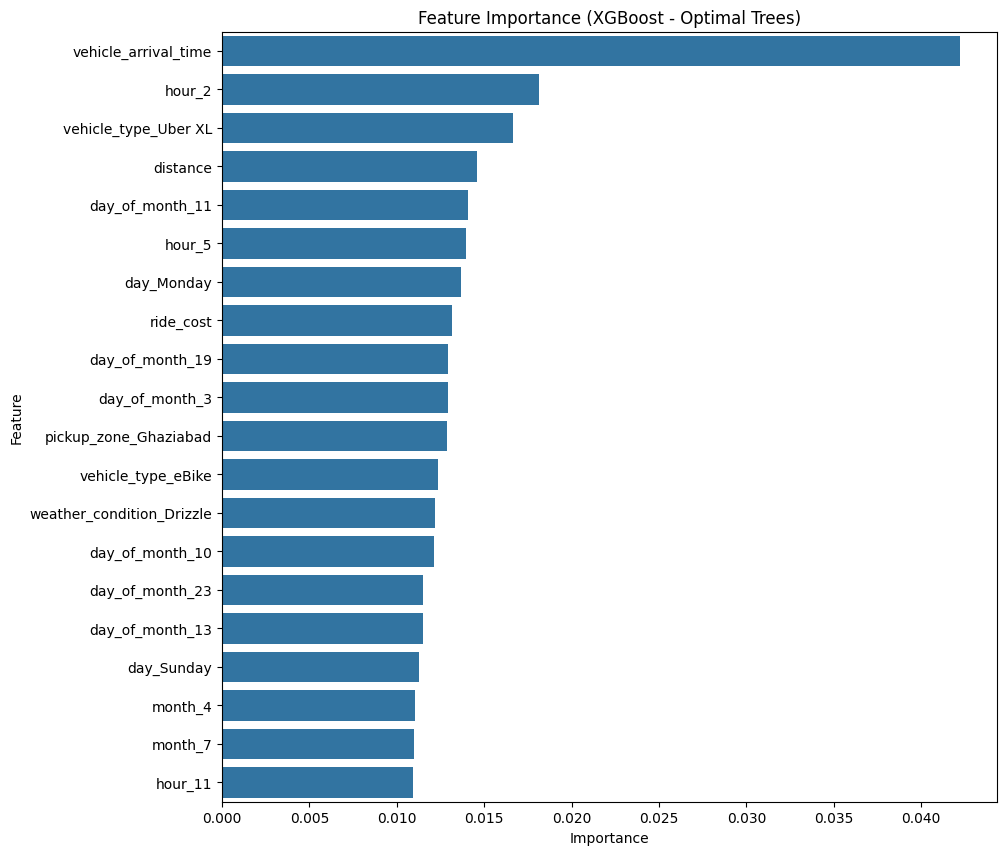

In [ ]:
# print("Loading data completed. Doing XGBoost Model\n")

# #1. Prepare X and y
# print("1. Preparing X and y")
# target_col = 'is_cancelled'
# numerical_cols = ['vehicle_arrival_time', 'distance', 'ride_cost','temperature', 'humidity', 'precipitation_mm']
# categorical_cols = [
#     'vehicle_type', 'customer_patience', 'pickup_zone', 'drop_zone',
#     'historical_customer_rating_binned', 'hour', 'day', 'month',
#     'day_of_month', 'weather_condition'
# ]

# numerical_cols = [col for col in numerical_cols if col in df1.columns]
# categorical_cols = [col for col in categorical_cols if col in df1.columns]
# feature_cols = numerical_cols + categorical_cols

# missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
# if missing_cols:
#     print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
#     raise KeyError(f"Missing required columns: {missing_cols}")

# else:
#     y = df1[target_col]
#     X = df1[feature_cols]
#     print(f"Original X shape: {X.shape}")
#     X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
#     print(f"New X shape after OHE: {X.shape}\n")

#     # 2. Splitting data
#     print("2. Splitting Data with Stratify")
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
#     print(f"Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
#     print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

#     # 3a. Calculate scale_pos_weight for XGBoost
#     print("3a. Calculating 'scale_pos_weight' for XGBoost...")
#     counts = y_train.value_counts()
#     scale_pos_weight = counts[0] / counts[1]
#     print(f"Scale Pos Weight (0s / 1s): {scale_pos_weight:.2f}\n")

#     # 3b. K-Fold Cross-Validation (NOW FINDS OPTIMAL TREES)
#     if XGB_INSTALLED:
#         print("3b. Starting Stratified K-Fold CV to find optimal tree count...")

#         # MANUALLY PERFORMING K-FOLD TO ACCESS FITTED MODEL PROPERTIES
#         kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#         cv_scores_recall = []
#         cv_best_trees = [] # <-- We will store the best tree count here

#         for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
#             print(f"--- Fold {fold+1}/5 ---")
#             X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
#             y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

#             # Create a new model for each fold
#             fold_model = XGBClassifier(
#                 n_estimators=1000, # Start high, let early stopping find the best for the fold
#                 random_state=42,
#                 n_jobs=-1,
#                 scale_pos_weight=scale_pos_weight,
#                 early_stopping_rounds=20, # Stop if it doesn't improve
#                 use_label_encoder=False, # Suppress deprecation warning
#                 eval_metric='logloss' # Use appropriate eval metric
#             )

#             # fitting with an eval_set for early stopping
#             fold_model.fit(
#                 X_train_fold, y_train_fold,
#                 eval_set=[(X_val_fold, y_val_fold)],
#                 verbose=False
#             )

#             # --- FIXED: Access best_iteration from the booster object ---
#             # Check if best_iteration is available before adding 1
#             best_trees_for_fold = fold_model.best_iteration + 1 if fold_model.best_iteration is not None else fold_model.get_params()['n_estimators']
#             print(f"Fold {fold+1} best tree count: {best_trees_for_fold}")
#             cv_best_trees.append(best_trees_for_fold)
#             # --- END FIX ---

#             fold_preds = fold_model.predict(X_val_fold)
#             report = classification_report(y_val_fold, fold_preds, output_dict=True, zero_division=0)
#             cv_scores_recall.append(report['1']['recall'])

#         # --- Calculate the average optimal number of trees ---
#         optimal_n_estimators = int(np.mean(cv_best_trees))
#         print(f"\nAverage optimal number of estimators: {optimal_n_estimators}\n")
#         # --- END NEW ---

#         print("--- XGBoost K-Fold CV Results ---")
#         print(f"Avg Recall (Class 1): {np.mean(cv_scores_recall):.4f} (+/- {np.std(cv_scores_recall):.4f})\n")


#     # --- 3c. Training the FINAL XGBoost Model (FIXED) ---
#     if XGB_INSTALLED:
#         print("3c. Training FINAL XGBoostClassifier with optimal estimators...")

#         # --- MODIFIED: No validation split, no early stopping ---
#         # Use the optimal_n_estimators found from the cross-validation
#         xgb_model = XGBClassifier(
#             n_estimators=optimal_n_estimators, # <-- USE OPTIMAL COUNT
#             random_state=42,
#             n_jobs=-1,
#             scale_pos_weight=scale_pos_weight,
#             use_label_encoder=False, # Suppress deprecation warning
#             eval_metric='logloss' # Use appropriate eval metric
#             # NO early_stopping_rounds or eval_set
#         )

#         # --- MODIFIED: Fit on the FULL 80% training set ---
#         xgb_model.fit(X_train, y_train)

#         print("Final Model training complete.\n")

#         # 4. Evaluating the Model
#         print("4. Evaluating FINAL Model on 20% Hold-Out Test Set")
#         y_pred = xgb_model.predict(X_test)
#         print("Classification Report (XGBoost):")
#         print(classification_report(y_test, y_pred, zero_division=0))

#         #5. Plot Confusion Matrix
#         print("Plotting Confusion Matrix...")
#         if CAN_PLOT_CM:
#             fig, ax = plt.subplots(figsize=(10, 7))
#             ConfusionMatrixDisplay.from_estimator(
#                 xgb_model, X_test, y_test, cmap='Blues', ax=ax,
#                 display_labels=['Not Cancelled (0)', 'Cancelled (1)']
#             )
#             plt.title('Confusion Matrix (XGBoost - Optimal Trees)')
#             plt.show()

#         #6. Plotting ROC-AUC Curve
#         print("Plotting ROC-AUC Curve...")
#         if CAN_PLOT_ROC:
#             fig, ax = plt.subplots(figsize=(10, 7))
#             RocAucDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax)
#             plt.title('ROC-AUC Curve (XGBoost - Optimal Trees)')
#             plt.show()

#         #7. Plotting Feature Importance
#         print("7. Plotting Feature Importance")
#         importances = xgb_model.feature_importances_
#         feature_names = X.columns
#         importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
#         importance_df = importance_df.sort_values(by='Importance', ascending=False)

#         plt.figure(figsize=(10, 10))
#         sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
#         plt.title('Feature Importance (XGBoost - Optimal Trees)')
#         plt.show()

#     else:
#         print("XGBoost script skipped as 'xgboost' library is not installed.")

XGBoost With Larger Tolerance Before Stopping To Find Best Tree

Loading data completed. Doing XGBoost Model

1. Preparing X and y
Original X shape: (95235, 16)
New X shape after OHE: (95235, 112)

2. Splitting Data with Stratify
Training set 1s: 1788 (2.35%)
Test set 1s: 447 (2.35%)

3a. Calculating 'scale_pos_weight' for XGBoost...
Scale Pos Weight (0s / 1s): 41.61

3b. Starting Stratified K-Fold CV to find optimal tree count...
--- Fold 1/5 ---
Fold 1 best tree count: 360
--- Fold 2/5 ---
Fold 2 best tree count: 339
--- Fold 3/5 ---
Fold 3 best tree count: 379
--- Fold 4/5 ---
Fold 4 best tree count: 395
--- Fold 5/5 ---
Fold 5 best tree count: 394

Average optimal number of estimators: 373

--- XGBoost K-Fold CV Results ---
Avg Recall (Class 1): 0.3613 (+/- 0.0166)

3c. Training FINAL XGBoostClassifier with optimal estimators...
Final Model training complete.

4. Evaluating FINAL Model on 20% Hold-Out Test Set
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     1

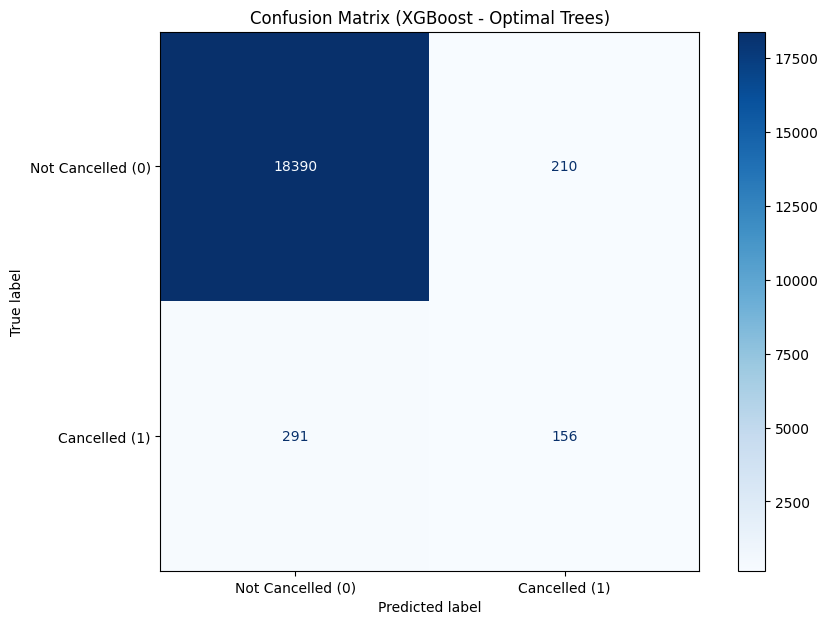

Plotting ROC-AUC Curve...
7. Plotting Feature Importance


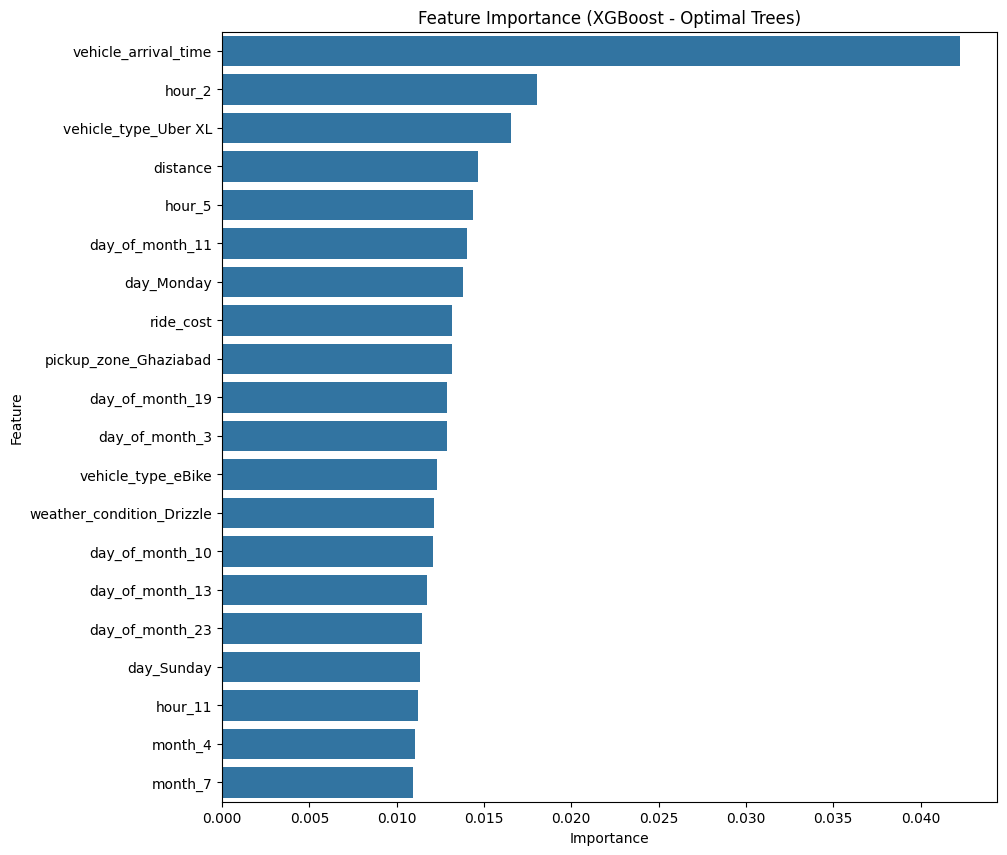

In [24]:
print("Loading data completed. Doing XGBoost Model\n")

#1. Prepare X and y
print("1. Preparing X and y")
target_col = 'is_cancelled'
numerical_cols = ['vehicle_arrival_time', 'distance', 'ride_cost','temperature', 'humidity', 'precipitation_mm']
categorical_cols = [
    'vehicle_type', 'customer_patience', 'pickup_zone', 'drop_zone',
    'historical_customer_rating_binned', 'hour', 'day', 'month',
    'day_of_month', 'weather_condition'
]

numerical_cols = [col for col in numerical_cols if col in df1.columns]
categorical_cols = [col for col in categorical_cols if col in df1.columns]
feature_cols = numerical_cols + categorical_cols

missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
if missing_cols:
    print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
    raise KeyError(f"Missing required columns: {missing_cols}")

else:
    y = df1[target_col]
    X = df1[feature_cols]
    print(f"Original X shape: {X.shape}")
    X = pd.get_dummies(X, columns=[col for col in categorical_cols if col in X.columns], drop_first=True)
    print(f"New X shape after OHE: {X.shape}\n")

    # 2. Splitting data
    print("2. Splitting Data with Stratify")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
    print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

    # 3a. Calculate scale_pos_weight for XGBoost
    print("3a. Calculating 'scale_pos_weight' for XGBoost...")
    counts = y_train.value_counts()
    scale_pos_weight = counts[0] / counts[1]
    print(f"Scale Pos Weight (0s / 1s): {scale_pos_weight:.2f}\n")

    # 3b. K-Fold Cross-Validation (NOW FINDS OPTIMAL TREES)
    if XGB_INSTALLED:
        print("3b. Starting Stratified K-Fold CV to find optimal tree count...")

        cv_model = XGBClassifier(
            n_estimators=500, # Start high, let early stopping find the best
            random_state=42,
            n_jobs=-1,
            scale_pos_weight=scale_pos_weight,
            early_stopping_rounds=20 # Stop if it doesn't improve
        )

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        cv_scores_recall = []
        cv_best_trees = [] # <-- NEW: We will store the best tree count here

        for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
            print(f"--- Fold {fold+1}/5 ---")
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            cv_model.fit(
                X_train_fold, y_train_fold,
                eval_set=[(X_val_fold, y_val_fold)],
                verbose=False
            )

            # --- FIXED: Use .best_iteration instead of .best_ntree_limit ---
            best_trees_for_fold = cv_model.best_iteration
            print(f"Fold {fold+1} best tree count: {best_trees_for_fold}")
            cv_best_trees.append(best_trees_for_fold)
            # --- END FIX ---

            fold_preds = cv_model.predict(X_val_fold)
            report = classification_report(y_val_fold, fold_preds, output_dict=True, zero_division=0)
            cv_scores_recall.append(report['1']['recall'])

        # --- NEW: Calculate the average optimal number of trees ---
        optimal_n_estimators = int(np.mean(cv_best_trees))
        print(f"\nAverage optimal number of estimators: {optimal_n_estimators}\n")
        # --- END NEW ---

        print("--- XGBoost K-Fold CV Results ---")
        print(f"Avg Recall (Class 1): {np.mean(cv_scores_recall):.4f} (+/- {np.std(cv_scores_recall):.4f})\n")


    # --- 3c. Training the FINAL XGBoost Model (FIXED) ---
    if XGB_INSTALLED:
        print("3c. Training FINAL XGBoostClassifier with optimal estimators...")

        # --- MODIFIED: No validation split, no early stopping ---
        xgb_model = XGBClassifier(
            n_estimators=optimal_n_estimators, # <-- USE OPTIMAL COUNT
            random_state=42,
            n_jobs=-1,
            scale_pos_weight=scale_pos_weight
            # NO early_stopping_rounds or eval_set
        )

        # --- MODIFIED: Fit on the FULL 80% training set ---
        xgb_model.fit(X_train, y_train)

        print("Final Model training complete.\n")

        # 4. Evaluating the Model
        print("4. Evaluating FINAL Model on 20% Hold-Out Test Set")
        y_pred = xgb_model.predict(X_test)
        print("Classification Report (XGBoost):")
        print(classification_report(y_test, y_pred, zero_division=0))

        #5. Plot Confusion Matrix
        print("Plotting Confusion Matrix...")
        if CAN_PLOT_CM:
            fig, ax = plt.subplots(figsize=(10, 7))
            ConfusionMatrixDisplay.from_estimator(
                xgb_model, X_test, y_test, cmap='Blues', ax=ax,
                display_labels=['Not Cancelled (0)', 'Cancelled (1)']
            )
            plt.title('Confusion Matrix (XGBoost - Optimal Trees)')
            plt.show()

        #6. Plotting ROC-AUC Curve
        print("Plotting ROC-AUC Curve...")
        if CAN_PLOT_ROC:
            fig, ax = plt.subplots(figsize=(10, 7))
            RocAucDisplay.from_estimator(xgb_model, X_test, y_test, ax=ax)
            plt.title('ROC-AUC Curve (XGBoost - Optimal Trees)')
            plt.show()

        #7. Plotting Feature Importance
        print("7. Plotting Feature Importance")
        importances = xgb_model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 10))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        plt.title('Feature Importance (XGBoost - Optimal Trees)')
        plt.show()

    else:
        print("XGBoost script skipped as 'xgboost' library is not installed.")



XGBoost With Column Transform and Scaling

Successfully imported XGBClassifier.
Successfully imported ConfusionMatrixDisplay.
Could not import RocAucDisplay. Will skip ROC-AUC plot. Error: cannot import name 'RocAucDisplay' from 'sklearn.metrics' (/usr/local/lib/python3.12/dist-packages/sklearn/metrics/__init__.py)
Loading data completed. Doing XGBoost Model (v4 - ColumnTransformer)

'df_with_weather' not found, loading from 'df'.
1. Preparing X and y
Original X shape: (95235, 16)

2. Splitting Data with Stratify
Training set 1s: 1788 (2.35%)
Test set 1s: 447 (2.35%)

3a. Calculating 'scale_pos_weight' for XGBoost...
Scale Pos Weight (0s / 1s): 41.61

3b. Defining the data preprocessor (ColumnTransformer)...
Preprocessor defined.

3c. Starting Stratified K-Fold CV to find optimal tree count...
--- Fold 1/5 ---
   - Fitting preprocessor on fold...
   - Data transformed.
Fold 1 best tree count: 360
--- Fold 2/5 ---
   - Fitting preprocessor on fold...
   - Data transformed.
Fold 2 best tree count: 339
--- Fold 3/5 ---
   - Fittin

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


   - Fitting final model...
Final Model training complete.

4. Evaluating FINAL Model on 20% Hold-Out Test Set
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18600
           1       0.43      0.35      0.38       447

    accuracy                           0.97     19047
   macro avg       0.71      0.67      0.69     19047
weighted avg       0.97      0.97      0.97     19047

Plotting Confusion Matrix...


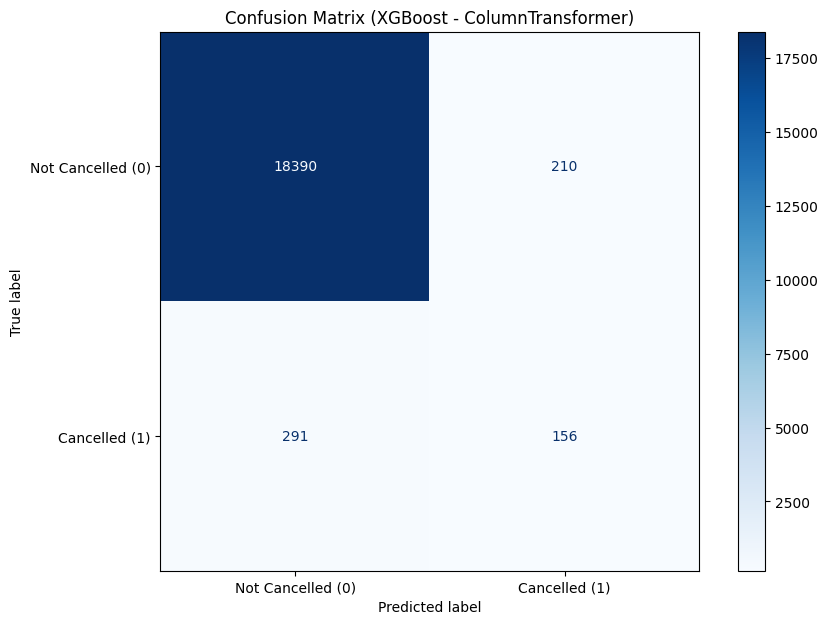

Plotting ROC-AUC Curve...
7. Plotting Feature Importance


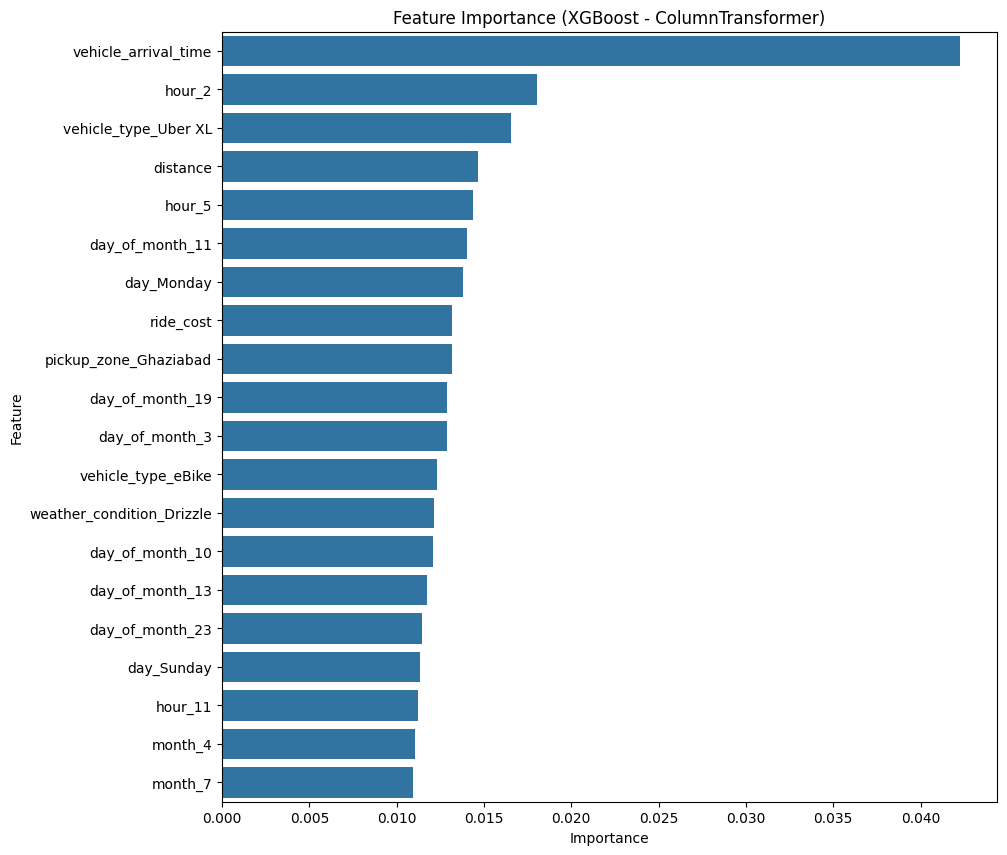

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.metrics import classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- NEW: Imports for ColumnTransformer ---
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# # --- END NEW IMPORTS ---

# # --- Import XGBoost ---
# try:
#     from xgboost import XGBClassifier
#     XGB_INSTALLED = True
#     print("Successfully imported XGBClassifier.")
# except ImportError:
#     print("="*50)
#     print("WARNING: 'xgboost' library not found.")
#     print("Please install it by running: !pip install xgboost")
#     print("Then, restart your runtime and run this script again.")
#     print("="*50)
#     XGB_INSTALLED = False

# # --- ROBUST PLOTTING IMPORTS ---
# try:
#     from sklearn.metrics import ConfusionMatrixDisplay
#     CAN_PLOT_CM = True
#     print("Successfully imported ConfusionMatrixDisplay.")
# except ImportError:
#     print("Could not import ConfusionMatrixDisplay. Will skip Confusion Matrix plot.")
#     CAN_PLOT_CM = False
# try:
#     from sklearn.metrics import RocAucDisplay
#     CAN_PLOT_ROC = True
#     print("Successfully imported RocAucDisplay.")
# except ImportError as e:
#     print(f"Could not import RocAucDisplay. Will skip ROC-AUC plot. Error: {e}")
#     CAN_PLOT_ROC = False
# # --- END OF ROBUST IMPORTS ---

# # --- 0. LOAD DATA ---
# print("Loading data completed. Doing XGBoost Model (v4 - ColumnTransformer)\n")
# try:
#     df1 = df_with_weather.copy()
#     print("Data loaded from 'df_with_weather'.")
# except NameError:
#     print("'df_with_weather' not found, loading from 'df'.")
#     df1 = df.copy()

# #1. Prepare X and y
# print("1. Preparing X and y")
# target_col = 'is_cancelled'
# numerical_cols = ['vehicle_arrival_time', 'distance', 'ride_cost','temperature', 'humidity', 'precipitation_mm']
# categorical_cols = [
#     'vehicle_type', 'customer_patience', 'pickup_zone', 'drop_zone',
#     'historical_customer_rating_binned', 'hour', 'day', 'month',
#     'day_of_month', 'weather_condition'
# ]

# numerical_cols = [col for col in numerical_cols if col in df1.columns]
# categorical_cols = [col for col in categorical_cols if col in df1.columns]
# feature_cols = numerical_cols + categorical_cols

# missing_cols = [col for col in feature_cols + [target_col] if col not in df1.columns]
# if missing_cols:
#     print(f"ERROR: The following required columns are missing from your data: {missing_cols}")
#     raise KeyError(f"Missing required columns: {missing_cols}")

# else:
#     y = df1[target_col]
#     # --- MODIFIED: X is now the raw DataFrame, NO get_dummies ---
#     X = df1[feature_cols]
#     print(f"Original X shape: {X.shape}\n")
#     # We will apply get_dummies *inside* the K-Fold loop

#     # 2. Splitting data
#     print("2. Splitting Data with Stratify")
#     # X_train and X_test now contain raw strings (e.g., 'Gurgaon')
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )
#     print(f"Training set 1s: {y_train.sum()} ({(y_train.mean()*100):.2f}%)")
#     print(f"Test set 1s: {y_test.sum()} ({(y_test.mean()*100):.2f}%)\n")

#     # 3a. Calculate scale_pos_weight for XGBoost
#     print("3a. Calculating 'scale_pos_weight' for XGBoost...")
#     counts = y_train.value_counts()
#     scale_pos_weight = counts[0] / counts[1]
#     print(f"Scale Pos Weight (0s / 1s): {scale_pos_weight:.2f}\n")

#     # --- NEW: 3b. Define the ColumnTransformer ---
#     print("3b. Defining the data preprocessor (ColumnTransformer)...")
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', 'passthrough', numerical_cols),
#             ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_cols)
#         ],
#         remainder='drop'
#     )
#     print("Preprocessor defined.\n")


#     # 3c. K-Fold Cross-Validation (NOW FINDS OPTIMAL TREES)
#     if XGB_INSTALLED:
#         print("3c. Starting Stratified K-Fold CV to find optimal tree count...")

#         cv_model = XGBClassifier(
#             n_estimators=500, # Start high, let early stopping find the best
#             random_state=42,
#             n_jobs=-1,
#             scale_pos_weight=scale_pos_weight,
#             early_stopping_rounds=20 # Stop if it doesn't improve
#         )

#         kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#         cv_scores_recall = []
#         cv_best_trees = []

#         for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
#             print(f"--- Fold {fold+1}/5 ---")
#             X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
#             y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

#             # --- MODIFIED: Fit preprocessor on fold, then transform ---
#             print("   - Fitting preprocessor on fold...")
#             # We fit the preprocessor ONLY on the fold's training data
#             preprocessor.fit(X_train_fold)

#             # Now we transform both the train and val sets for this fold
#             X_train_fold_t = preprocessor.transform(X_train_fold)
#             X_val_fold_t = preprocessor.transform(X_val_fold)
#             print("   - Data transformed.")
#             # --- END MODIFICATION ---

#             cv_model.fit(
#                 X_train_fold_t, y_train_fold, # <-- Fit on transformed data
#                 eval_set=[(X_val_fold_t, y_val_fold)], # <-- Eval on transformed data
#                 verbose=False
#             )

#             best_trees_for_fold = cv_model.best_iteration
#             print(f"Fold {fold+1} best tree count: {best_trees_for_fold}")
#             cv_best_trees.append(best_trees_for_fold)

#             fold_preds = cv_model.predict(X_val_fold_t) # <-- Predict on transformed data
#             report = classification_report(y_val_fold, fold_preds, output_dict=True, zero_division=0)
#             cv_scores_recall.append(report['1']['recall'])

#         optimal_n_estimators = int(np.mean(cv_best_trees))
#         print(f"\nAverage optimal number of estimators: {optimal_n_estimators}\n")

#         print("--- XGBoost K-Fold CV Results ---")
#         print(f"Avg Recall (Class 1): {np.mean(cv_scores_recall):.4f} (+/- {np.std(cv_scores_recall):.4f})\n")


#     # --- 3d. Training the FINAL XGBoost Model ---
#     if XGB_INSTALLED:
#         print("3d. Training FINAL XGBoostClassifier with optimal estimators...")

#         xgb_model = XGBClassifier(
#             n_estimators=optimal_n_estimators, # <-- USE OPTIMAL COUNT
#             random_state=42,
#             n_jobs=-1,
#             scale_pos_weight=scale_pos_weight
#         )

#         # --- MODIFIED: Fit preprocessor on FULL X_train, transform both sets ---
#         print("   - Fitting final preprocessor on full 80% X_train...")
#         preprocessor.fit(X_train)

#         print("   - Transforming X_train and X_test...")
#         X_train_transformed = preprocessor.transform(X_train)
#         X_test_transformed = preprocessor.transform(X_test)
#         # --- END MODIFICATION ---

#         print("   - Fitting final model...")
#         xgb_model.fit(X_train_transformed, y_train) # <-- Fit on 80% transformed data
#         print("Final Model training complete.\n")

#         # 4. Evaluating the Model
#         print("4. Evaluating FINAL Model on 20% Hold-Out Test Set")
#         y_pred = xgb_model.predict(X_test_transformed) # <-- Predict on transformed data
#         print("Classification Report (XGBoost):")
#         print(classification_report(y_test, y_pred, zero_division=0))

#         #5. Plot Confusion Matrix
#         print("Plotting Confusion Matrix...")
#         if CAN_PLOT_CM:
#             fig, ax = plt.subplots(figsize=(10, 7))
#             ConfusionMatrixDisplay.from_estimator(
#                 xgb_model, X_test_transformed, y_test, cmap='Blues', ax=ax, # <-- Use transformed data
#                 display_labels=['Not Cancelled (0)', 'Cancelled (1)']
#             )
#             plt.title('Confusion Matrix (XGBoost - ColumnTransformer)')
#             plt.show()

#         #6. Plotting ROC-AUC Curve
#         print("Plotting ROC-AUC Curve...")
#         if CAN_PLOT_ROC:
#             fig, ax = plt.subplots(figsize=(10, 7))
#             RocAucDisplay.from_estimator(xgb_model, X_test_transformed, y_test, ax=ax) # <-- Use transformed data
#             plt.title('ROC-AUC Curve (XGBoost - ColumnTransformer)')
#             plt.show()

#         #7. Plotting Feature Importance
#         print("7. Plotting Feature Importance")

#         # --- MODIFIED: Get feature names from ColumnTransformer ---
#         try:
#             ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
#             all_feature_names = numerical_cols + list(ohe_feature_names)
#         except Exception as e:
#             print(f"Could not get feature names from preprocessor: {e}")
#             # Fallback to simple list if names don't work
#             all_feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]
#         # --- END MODIFICATION ---

#         importances = xgb_model.feature_importances_
#         importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
#         importance_df = importance_df.sort_values(by='Importance', ascending=False)

#         plt.figure(figsize=(10, 10))
#         sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
#         plt.title('Feature Importance (XGBoost - ColumnTransformer)')
#         plt.show()

#     else:
#         print("XGBoost script skipped as 'xgboost' library is not installed.")
